In [1]:
import pandas as pd

cities = pd.read_csv('geonames-all-cities-with-a-population-1000.csv', sep=';')
countries_eu = pd.read_csv('eu-countries.csv')

In [2]:
cities_eu = cities[
    (cities['Population'] > 100000) 
    & (cities['Timezone'].str.contains('Europe'))
    & cities['Country Code'].isin(countries_eu['Alpha-2'])
].sort_values('Population', ascending=False)

# We're not going to the UK, so we'll remove it
cities_eu = cities_eu[cities_eu['Country name EN'] != 'United Kingdom']

In [3]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['iso_a3'].isin(countries_eu['Alpha-3'])]

# we're not going to the France in South America, so we'll remove that from the map
europe.at[europe.index[europe['name'] == 'France'][0], 'geometry'] = europe.loc[europe.index[europe['name'] == 'France'][0], 'geometry'].geoms[1:]
cities_eu = gpd.GeoDataFrame(cities_eu, geometry=gpd.points_from_xy(cities_eu['Coordinates'].str.split(',').apply(lambda x: x[1]), cities_eu['Coordinates'].str.split(',').apply(lambda x: x[0])))

/Users/v/.virtualenvs/travel/lib/python3.9/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

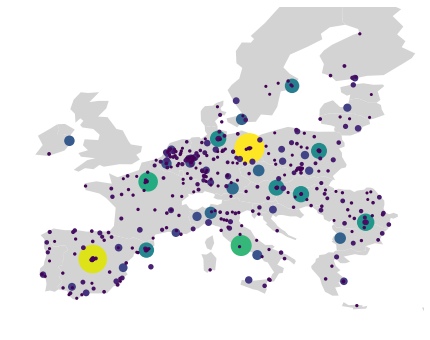

In [11]:
ax = gplt.polyplot(europe, edgecolor='None', facecolor='lightgray')
# gplt.pointplot(cities_eu, ax=ax)
gplt.pointplot(
    cities_eu,
    hue='Population', scale='Population',
    edgecolor='None', ax=ax, limits=[3,30]
)
